## 리뷰 키워드 감정 분석 분류 시스템 ↓

In [1]:
pip install konlpy tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# CSV 파일 로드
df = pd.read_csv("review_label.csv")

# 리뷰 텍스트 리스트
texts = df["review"].tolist()

# 라벨 리스트
labels = df["label"].tolist()

# 확인
print(len(texts), len(labels))
print(texts[:3])
print(labels[:3])

# cleanup
del df

1000 1000
['아주 차량 인수인계가 너무 대충 이루어졌어요 불만족 ㅜㅜ', '아주 차량이 더러운 상태로 도착해서 놀랐습니다 별로...', '매우 약속 시간을 지키지 않고 연락도 없었어요 비추천 ㅠㅠ']
[0, 0, 0]


In [3]:
# 불용어(stopwords) 정의 (중요)
stopwords = set([
    # 조사
    '이', '가', '을', '를', '의', '에', '에서', '로', '으로', '와', '과', 
    '도', '만', '까지', '부터', '한테', '에게', '께', '더러', '라고',
    
    # 어미
    '은', '는', '이다', '입니다', '습니다', 'ㅂ니다', '합니다', 
    '해요', '이에요', '예요', '네요', '군요', '구나', '구먼',
    
    # 대명사
    '저', '제', '나', '내', '우리', '저희', '너', '당신',
    '이것', '그것', '저것', '여기', '거기', '저기',
    
    # 관형사/부사 (의미 없는 것만)
    '그', '이', '저', '어떤', '무슨', '모든', '어느',
    '좀', '잘', '더', '덜', '매우', '아주', '조금', '많이',
    
    # 접속사
    '그리고', '그러나', '하지만', '또', '및', '또는', '혹은',
    
    # 기타 불필요한 단어
    '것', '수', '등', '및', '때', '년', '월', '일',
    '하다', '되다', '있다', '없다', '이다', '아니다',
    
    # 탁송 리뷰에서 의미 없는 단어들
    '이용', '서비스', '업체', '회사'  # 너무 일반적이어서 구별력 없음
])

In [4]:
# 한글 형태소 분석 (Okt), 불용어 제거
from konlpy.tag import Okt

okt = Okt()

def tokenize(text):
    tokens = okt.morphs(text, stem=True)
    tokens = [t for t in tokens if t not in stopwords]
    return tokens

tokenized_texts = [tokenize(t) for t in texts]

print(tokenized_texts)

[['차량', '인수', '인계', '너무', '대충', '이루어지다', '불만족', 'ㅜㅜ'], ['차량', '더럽다', '상태', '도착', '놀라다', '별로', '...'], ['약속', '시간', '지키다', '않다', '연락', '비', '추천', 'ㅠㅠ'], ['너무', '신차', '탁송', '완벽하다', '배송', '해주다', '감사하다', '.'], ['차량', '인수', '인계', '꼼꼼하다', '전문', '적', '좋다', '!', '^^'], ['진짜', '차량', '인수', '인계', '꼼꼼하다', '전문', '적', '강', '추하다', '^^'], ['굉장하다', '약속', '시간', '한참', '늦다', '도착', '일정', '꼬이다', '실망', 'ㅜㅜ'], ['굉장하다', '장거리', '탁송', '차량', '무사하다', '자다', '도착', '추천', '!.'], ['너무', '기사', '님', '태도', '불친절하다', '기분', '상', '최악', 'ㅜㅜ'], ['여러', '번', '항상', '만족스럽다', '강', '추하다', 'ㅎㅎ'], ['추가', '비용', '계속', '발생', '당황', '스럽다', '실망', '...'], ['정말', '배송', '중', '차량', '상태', '계속', '알다', '안', '심하다', '.'], ['너무', '약속', '시간', '보다', '일찍', '도착', '해주다', '감사하다', '좋다', '!', '^^'], ['정말', '추천', '받다', '역시', '믿다', '네', '요', '!!'], ['정말', '약속', '시간', '보다', '일찍', '도착', '해주다', '감사하다', '좋다', '!!!'], ['상당하다', '차량', '더럽다', '상태', '도착', '놀라다', '실망', '.'], ['상당하다', '빠르다', '배송', '급하다', '일정', '크다', '도움', '되어다', '감사하다', '.'], ['완전', '기사', '님', '연락', '자다',

In [5]:
# 단어장 생성
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
# tokenizer에 토큰을 전달하여 단어장을 생성
tokenizer.fit_on_texts(tokenized_texts)
# tokenizer에 생성된 단어장 확인
word_index = tokenizer.word_index
print(word_index)

{'차량': 1, '정말': 2, '해주다': 3, '!': 4, '.': 5, '추천': 6, '좋다': 7, '너무': 8, '되어다': 9, '^^': 10, 'ㅎㅎ': 11, '감사하다': 12, '만족하다': 13, '!!': 14, '완전': 15, '상당하다': 16, '배송': 17, 'ㅜㅜ': 18, '굉장하다': 19, '안': 20, '진짜': 21, '기사': 22, '님': 23, '강': 24, '추하다': 25, '...': 26, 'ㅠㅠ': 27, '자다': 28, '최고': 29, '처리': 30, '시간': 31, '없이': 32, '않다': 33, '관리': 34, '탁송': 35, '안전하다': 36, '도착': 37, '약속': 38, '인계': 39, '별로': 40, '상태': 41, '계속': 42, '일정': 43, '정확하다': 44, '장거리': 45, '추가': 46, '비용': 47, '보다': 48, '받다': 49, '하고': 50, '불만족': 51, '개선': 52, '필요': 53, '실망': 54, '스럽다': 55, '인데': 56, '가격': 57, '최악': 58, '지키다': 59, '꼼꼼하다': 60, '비': 61, '깨끗하다': 62, '가다': 63, '적': 64, '믿다': 65, '시': 66, '에도': 67, '확인': 68, '요청': 69, '이루어지다': 70, '!.': 71, '!!!': 72, '빠르다': 73, '흠집': 74, '맡기다': 75, '인수': 76, '예약': 77, '신뢰': 78, '사진': 79, '보내다': 80, '점검': 81, '출발': 82, '친절하다': 83, '전화': 84, '키': 85, '보험': 86, '응대': 87, '싶다': 88, '여러': 89, '번': 90, '걱정': 91, '돼다': 92, '대충': 93, '연락': 94, '실시간': 95, '위치': 96, '편리하다': 97, '인도': 98, '세

In [6]:
# 정수 인코딩
sequences = tokenizer.texts_to_sequences(tokenized_texts)
print(sequences)

[[1, 76, 39, 8, 93, 70, 51, 18], [1, 195, 41, 37, 196, 40, 26], [38, 31, 59, 33, 94, 61, 6, 27], [8, 138, 35, 139, 17, 3, 12, 5], [1, 76, 39, 60, 129, 64, 7, 4, 10], [21, 1, 76, 39, 60, 129, 64, 24, 25, 10], [19, 38, 31, 192, 193, 37, 43, 194, 54, 18], [19, 45, 35, 1, 108, 28, 37, 6, 71], [8, 22, 23, 169, 103, 104, 170, 58, 18], [89, 90, 163, 164, 24, 25, 11], [46, 47, 42, 109, 110, 55, 54, 26], [2, 17, 112, 1, 41, 42, 113, 20, 165, 5], [8, 38, 31, 48, 118, 37, 3, 12, 7, 4, 10], [2, 6, 49, 119, 65, 120, 121, 14], [2, 38, 31, 48, 118, 37, 3, 12, 7, 72], [16, 1, 195, 41, 37, 196, 54, 5], [16, 73, 17, 134, 43, 135, 136, 9, 12, 5], [15, 22, 23, 94, 28, 20, 9, 122, 58, 18], [16, 1, 76, 39, 60, 129, 64, 24, 25, 10], [21, 84, 87, 83, 77, 150, 151, 12, 4], [2, 45, 56, 46, 47, 32, 44, 111, 7, 4, 10], [15, 166, 87, 103, 104, 167, 51, 26], [2, 46, 47, 42, 109, 110, 55, 58, 27], [15, 38, 31, 48, 118, 37, 3, 12, 13, 14], [84, 152, 42, 20, 49, 107, 61, 6, 27], [95, 96, 68, 97, 12, 11], [2, 1, 98, 66

In [7]:
# Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LEN = 10  # 한 문장에 포함된 토큰의 수가 10을 초과하는 경우가 거의 없다

X = pad_sequences(sequences, maxlen=MAX_LEN)
y = labels

In [8]:
# 학습 / 테스트 분리
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

X_train = np.array(X_train).astype('int32')
X_test = np.array(X_test).astype('int32')

# y_train, y_test도 동일하게 변환 (분류 모델이므로 보통 int32)
y_train = np.array(y_train).astype('int32')
y_test = np.array(y_test).astype('int32')

In [9]:
# 모델 구성 (Embedding + LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input

#정수로 인코딩된 한개의 문장이 모델에 입력될 때는 패딩으로 추가된 0도 포함되어 있음
#그러나 위에서 생성된 단어장에는 0과 매핑된 단어는 보이지 않으므로 모델이 0의 의미는 해석 불가
#위에서 생성된 단어장에는 1부터 숫자가 배정되어 있지만 내부에서 실제 사용되는 단어장에는 0부터 시작됨
#내부에서 사용되는 실제 단어장에는 <PAD>:0 아이템도 추가되어 실제 토큰 수 + 1개가 됨
VOCAB_SIZE = len(word_index) + 1

model = Sequential([
    Input(shape=(MAX_LEN,)),      # 입력 데이터의 형태를 명시
    Embedding(VOCAB_SIZE, 64),    # 64차원벡터, 처음에는 무작위로 벡터의 원소 설정(크기,방향)
    LSTM(64),                     # 문장의 순서도 학습
    Dense(1, activation="sigmoid")# 이진분류(긍정/부정) 
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 10, 64)              │          12,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,697 (178.50 KB)

 Trainable params: 45,697 (178.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 콜백(EarlyStop, ModelCheckpoint)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1. EarlyStopping: 검증 손실(val_loss)이 3회 연속 개선되지 않으면 학습을 조기 종료합니다.
early_stopping = EarlyStopping(
    monitor='val_loss',      # 감시 지표: 검증 손실
    patience=10,              # 개선되지 않아도 지켜볼 에포크 횟수
    restore_best_weights=True # 종료 후 가장 성적이 좋았던 가중치로 복구
)

# 2. ModelCheckpoint: 검증 성적이 가장 좋은 모델을 파일로 저장합니다.
checkpoint_path = "best_consignment_model.keras" # 2026년 기준 .keras 확장자 권장
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',      # 감시 지표
    save_best_only=True,     # 가장 좋은 모델만 저장
    verbose=1                # 저장 시 로그 출력
)

In [11]:
# 학습
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6688 - loss: 0.5768
Epoch 1: val_loss improved from None to 0.09894, saving model to best_consignment_model.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7875 - loss: 0.4082 - val_accuracy: 1.0000 - val_loss: 0.0989
Epoch 2/100
26/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9978 - loss: 0.0678 
Epoch 2: val_loss improved from 0.09894 to 0.00587, saving model to best_consignment_model.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9987 - loss: 0.0309 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 3/100
26/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0047 
Epoch 3: val_loss improved from 0.00587 to 0.00229, saving model to best_consignment_model.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 4/100
26/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0019 
Epoch 4: val_loss did n

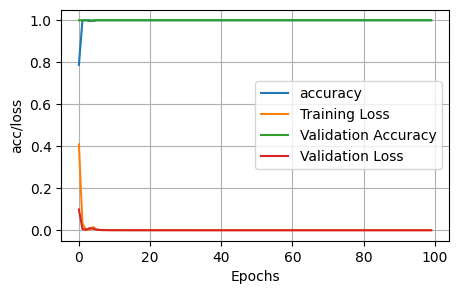

In [12]:
history.history.keys()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.plot(acc, label='accuracy')
plt.plot(loss, label='Training Loss')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('acc/loss')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# 모델 활용
def predict_sentiment(text):
    tokens = tokenize(text)
    seq = tokenizer.texts_to_sequences([tokens])
    padded = pad_sequences(seq, maxlen=MAX_LEN)
    prob = model.predict(padded)[0][0]
    return prob, "긍정" if prob >= 0.5 else "부정"

prob, label = predict_sentiment("완전 기사님과 연락이 잘 안 되어서 불안했어요 최악 ㅜㅜ")   # 부정 
print(prob, label)

prob, label = predict_sentiment("탁송 기사님이 친절하고 약속된 시간 내에 도착했어요")  # 긍정
print(prob, label)

prob, label = predict_sentiment("기사님이 인수인계를 하는 태도가 성실하지 않았어요")  # 부정
print(prob, label)

prob, label = predict_sentiment("서비스는 전반적으로 만족하지만 운행거리 미터수가 왜 그렇게 많은지 자세히 알려주면 더 좋겠어요")  # 긍정
print(prob, label)

prob, label = predict_sentiment("이 서비스는 절대로 권장하지 않습니다")  # 부정
print(prob, label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1.5577466e-06 부정
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
0.9999156 긍정
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
5.0537707e-05 부정
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
0.99999917 긍정
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
0.011523402 부정


In [17]:
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ==============================
# 감정 분석 함수
# ==============================
def predict_sentiment(text):
    tokens = tokenize(text)
    seq = tokenizer.texts_to_sequences([tokens])
    padded = pad_sequences(seq, maxlen=MAX_LEN)
    prob = model.predict(padded, verbose=0)[0][0]
    label = "긍정" if prob >= 0.5 else "부정"
    return prob, label

# ==============================
# 엑셀 로드
# ==============================
FILE_PATH = "drivers_2026.xlsx"
df = pd.read_excel(FILE_PATH)

# ==============================
# 사용자 입력
# ==============================
input_number = input("고객 번호를 입력하세요: ").strip()
input_review = input("리뷰 내용을 입력하세요: ").strip()

# ==============================
# 고객 검색
# ==============================
target = df[df['번호'] == input_number]

if target.empty:
    print("❌ 해당 고객 번호를 찾을 수 없습니다.")
    exit()

idx = target.index[0]
row = target.iloc[0]

# ==============================
# 감정 분석
# ==============================
prob, label = predict_sentiment(input_review)

# ==============================
# 점수 계산
# ==============================
current_score = int(row['고객리뷰'])

if label == "긍정":
    new_score = min(current_score + 3, 100)
else:
    new_score = max(current_score - 3, 0)

df.at[idx, '고객리뷰'] = new_score

# ==============================
# 콘솔 출력 (입력 고객만)
# ==============================
print("\n========== 고객 정보 ==========")
print(f"번호        : {row['번호']}")
print(f"대리점      : {row['대리점']}")
print(f"이름        : {row['이름']}")
print(f"연락처      : {row['연락처']}")
print(f"주소        : {row['주소']}")
print(f"면허종류    : {row['면허종류']}")
print(f"탁송보험    : {row['탁송보험']}")

print("\n========== 리뷰 분석 ==========")
print(f"입력 리뷰   : {input_review}")
print(f"판정 결과   : {label}")
print(f"신뢰 확률   : {prob:.4f}")
print(f"점수 변경   : {current_score} → {new_score}")

# ==============================
# 엑셀 자동 저장
# ==============================
df.to_excel(FILE_PATH, index=False)
print("\n✅ 고객리뷰 점수 업데이트 및 저장 완료")


고객 번호를 입력하세요:  26_2
리뷰 내용을 입력하세요:  "매우 전화를 해도 계속 안 받으셔서 답답했어요 비추천 ㅠㅠ"



========== 고객 정보 ==========
번호        : 26_2
대리점      : 서울동부대리점
이름        : 한서아
연락처      : 010-2929-1492
주소        : 서울동부 강남대로 100
면허종류    : 1종 대형
탁송보험    : KB손해

========== 리뷰 분석 ==========
입력 리뷰   : "매우 전화를 해도 계속 안 받으셔서 답답했어요 비추천 ㅠㅠ"
판정 결과   : 부정
신뢰 확률   : 0.0000
점수 변경   : 96 → 93

✅ 고객리뷰 점수 업데이트 및 저장 완료
